<a href="https://colab.research.google.com/github/ArfaKhalid/Spatial-Computing/blob/main/GGS_590_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
Q1. OpenStreetMap has a wealth of spatial data which we can apply to spatial computing tasks. We will want to utilize this resource to help us to develop a script which subsets key datasets of interest for a capital region (50 points).
1. Select a small country (e.g., so you can easily download and intersect the available data). Think Rwanda, Liechtenstein, Tuvalu, Malta, Monaco etc.
2. Download OSM data from the GeoFabrik server (.shp may be easiest).
3. Download the associated boundaries from GADM for your selected country (.shp may be easiest).
4. Subset a boundary shape for the capital city region.
5. Write code to intersect and export the road and rail network, and Points of Interest (PoIs).

In [63]:
# Import library and dataset
import geopandas as gpd
gdf = gpd.read_file('gadm41_MLT_1.shp', crs='epsg:4326')

/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [64]:
# To explore dataset
!pip install geopandas folium mapclassify
gdf.explore()

In [65]:
# To find the capital city
import geopandas as gpd

malta_boundary = gpd.read_file('gadm41_MLT_1.shp')

# 1. Check the column names:
print(malta_boundary.columns)

# 2. Check the unique values in the 'NAME_1'column:
print(malta_boundary['NAME_1'].unique())

# 3. Check for any errors or inconsistencies in the data:
print(malta_boundary.isna().sum())  # Check for missing values
print(malta_boundary.geometry.is_valid.sum())  # Check for invalid geometries

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
['Ċentrali' 'Għawdex' 'Nofsinhar' 'Tramuntana' 'Xlokk']
GID_1        0
GID_0        0
COUNTRY      0
NAME_1       0
VARNAME_1    0
NL_NAME_1    0
TYPE_1       0
ENGTYPE_1    0
CC_1         0
HASC_1       0
ISO_1        0
geometry     0
dtype: int64
5


6832
11
1441


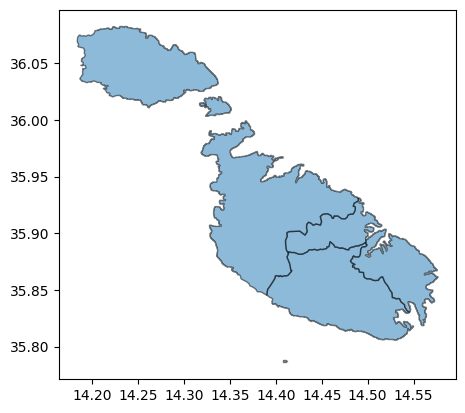

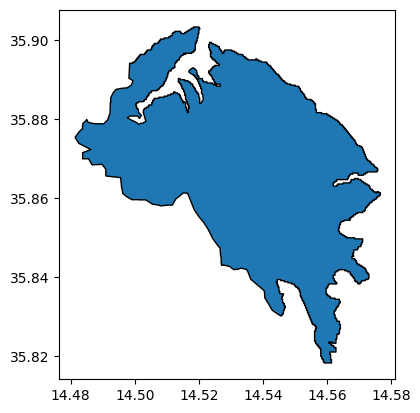

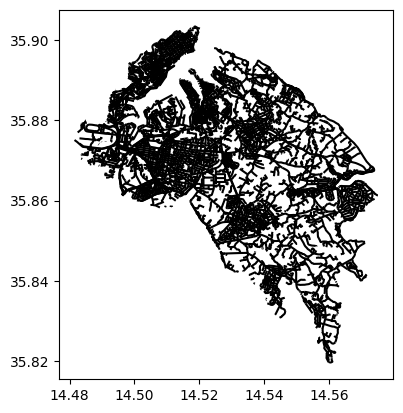

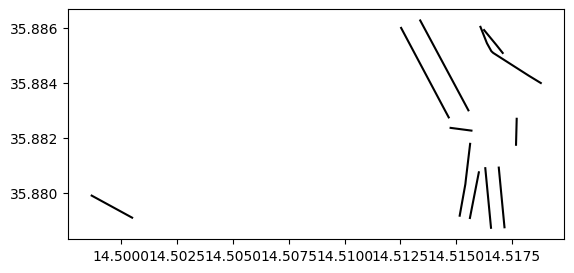

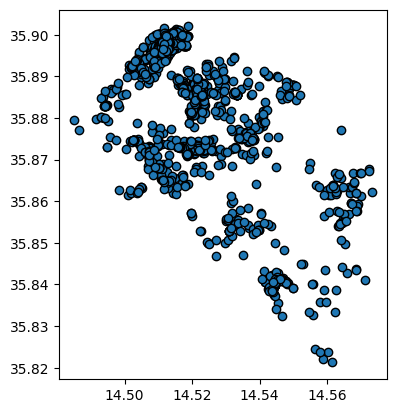

In [66]:
import geopandas as gpd

# Step 1: Load OSM data for Malta
osm_roads = gpd.read_file('gis_osm_roads_free_1.shp')  # Path to roads layer from GeoFabrik
osm_pois = gpd.read_file('gis_osm_pois_free_1.shp')    # Path to POIs layer from GeoFabrik
osm_railways = gpd.read_file('gis_osm_railways_free_1.shp')  # Path to railways

# Step 2: Load GADM boundary for Malta
malta_boundary = gpd.read_file('gadm41_MLT_1.shp')  # Path to the GADM for Malta

# Step 3: Subset boundary for the capital city
capital_city_boundary = malta_boundary[malta_boundary['NAME_1'] == 'Xlokk']

# Step 4: Intersection to get road, rail network and pois within Xlokk (Valletta)
roads_in_Xlokk = gpd.overlay(osm_roads, capital_city_boundary, how='intersection')
railways_in_Xlokk = gpd.overlay(osm_railways, capital_city_boundary, how='intersection')
pois_in_Xlokk = gpd.overlay(osm_pois, capital_city_boundary, how='intersection')

# step 5 : plot boundaries
malta_boundary.plot(alpha=0.5, edgecolor='k') #original
capital_city_boundary.plot(edgecolor='k') #subset
print(len(roads_in_Xlokk))
roads_in_Xlokk.plot(edgecolor='k')
print(len(railways_in_Xlokk))
railways_in_Xlokk.plot(edgecolor='k')
print(len(pois_in_Xlokk))
pois_in_Xlokk.plot(edgecolor='k')
# Step 6: Export the resulting datasets to new shapefiles
roads_in_Xlokk.to_file('roads_in_Xlokk.shp')
railways_in_Xlokk.to_file('railways_in_Xlokk.shp')
pois_in_Xlokk.to_file('pois_in_Xlokk.shp')


# Task 2
Q2. Complete the following spatial computing question set (50 points):
1. Load in the building dataset for your chosen country.
2. Try to estimate the ground-floor building area in square meters.
3. Consider different scenarios for estimating the total building floorspace where the mean building height is 2, 3, or 4 floors high.
4. We have covered the steps for this in a previous class, where we took the geometry area of a chosen polygon or set of polygons. You need to work out how to implement this within the example. Consider reporting your results as plots.  

In [67]:
import geopandas as gpd

# Load the building dataset
buildings = gpd.read_file('gis_osm_buildings_a_free_1.shp')


In [68]:
# Estimating the ground-floor building area in square meters
buildings = buildings.to_crs(epsg=3857)

# Calculate the area of each building's footprint in square meters
buildings['ground_area_sqm'] = buildings['geometry'].area

# print head
print(buildings[['geometry', 'ground_area_sqm']].head())


                                            geometry  ground_area_sqm
0  POLYGON ((1616097.272 4286772.734, 1616108.849...      8417.341558
1  POLYGON ((1615495.824 4286549.355, 1615504.874...      3921.715918
2  POLYGON ((1595160.881 4301559.284, 1595167.872...      1071.218095
3  POLYGON ((1592873.354 4308252.033, 1592886.457...       293.166459
4  POLYGON ((1609295.707 4277403.175, 1609303.388...       374.819727


   ground_area_sqm  total_floorspace_2_floors  total_floorspace_3_floors  \
0      8417.341558               16834.683115               25252.024673   
1      3921.715918                7843.431837               11765.147755   
2      1071.218095                2142.436190                3213.654285   
3       293.166459                 586.332918                 879.499376   
4       374.819727                 749.639454                1124.459181   

   total_floorspace_4_floors  
0               33669.366231  
1               15686.863674  
2                4284.872380  
3                1172.665835  
4                1499.278909  


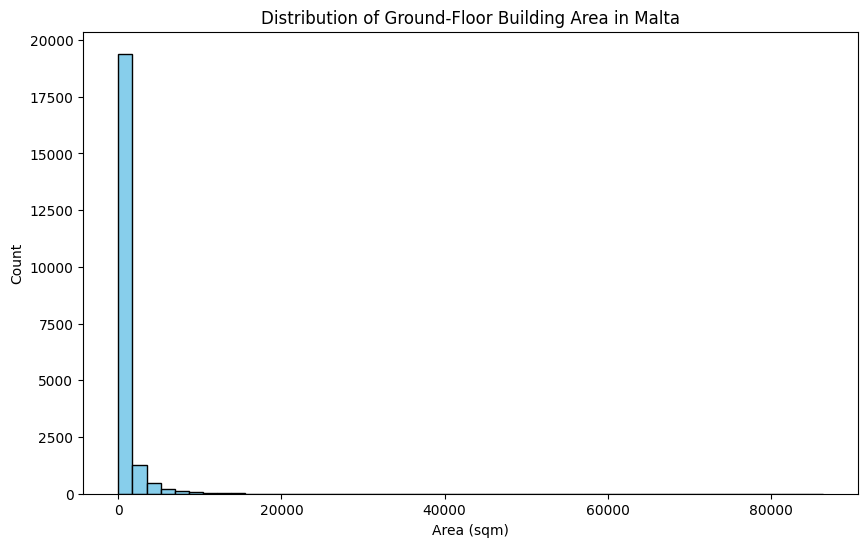

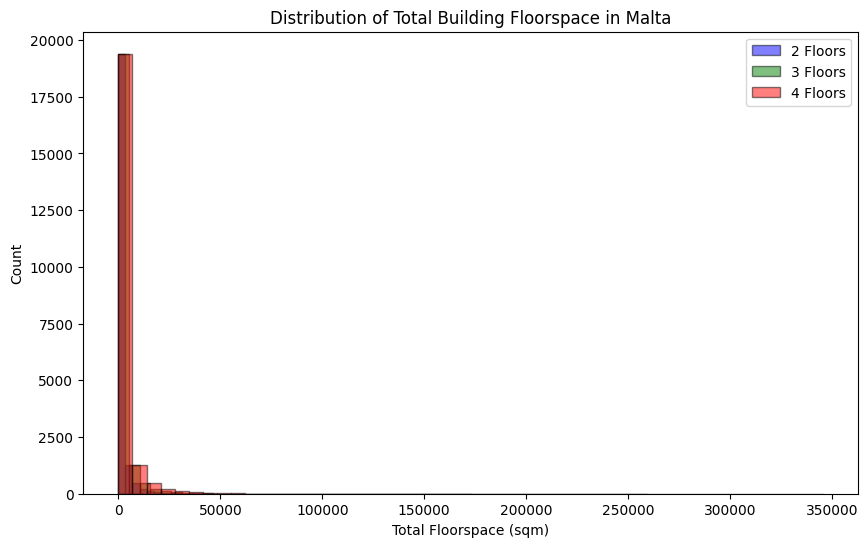

In [71]:
# Scenario 1: Buildings are on average 2 floors high
buildings['total_floorspace_2_floors'] = buildings['ground_area_sqm'] * 2

# Scenario 2: Buildings are on average 3 floors high
buildings['total_floorspace_3_floors'] = buildings['ground_area_sqm'] * 3

# Scenario 3: Buildings are on average 4 floors high
buildings['total_floorspace_4_floors'] = buildings['ground_area_sqm'] * 4

# View the head
print(buildings[['ground_area_sqm', 'total_floorspace_2_floors', 'total_floorspace_3_floors', 'total_floorspace_4_floors']].head())
import matplotlib.pyplot as plt

# Plot the distribution of ground-floor building area
plt.figure(figsize=(10, 6))
plt.hist(buildings['ground_area_sqm'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Ground-Floor Building Area in Malta')
plt.xlabel('Area (sqm)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of total building floorspace for 2, 3, and 4 floors
plt.figure(figsize=(10, 6))
plt.hist(buildings['total_floorspace_2_floors'], bins=50, alpha=0.5, label='2 Floors', color='blue', edgecolor='black')
plt.hist(buildings['total_floorspace_3_floors'], bins=50, alpha=0.5, label='3 Floors', color='green', edgecolor='black')
plt.hist(buildings['total_floorspace_4_floors'], bins=50, alpha=0.5, label='4 Floors', color='red', edgecolor='black')
plt.title('Distribution of Total Building Floorspace in Malta')
plt.xlabel('Total Floorspace (sqm)')
plt.ylabel('Count')
plt.legend()
plt.show()